In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout,Conv2D,MaxPooling2D,Add
from tensorflow.keras import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()

train_x = train_x.reshape(-1, 28, 28, 1)  # Reshape for CNN (add a channel dimension)
test_x = test_x.reshape(-1, 28, 28, 1)

train_x = train_x.astype('float32') / 255  # Normalize pixel values
test_x = test_x.astype('float32') / 255

train_y = tf.keras.utils.to_categorical(train_y, 10)  # One-hot encoding of labels
test_y = tf.keras.utils.to_categorical(test_y, 10)

from sklearn.model_selection import train_test_split
test_x, valid_x, test_y, valid_y = train_test_split( test_x, test_y, test_size=0.5, random_state=0)

train_x[1].shape

(28, 28, 1)

In [3]:
from tensorflow.keras.layers import Input
def CNN():
    input_ = Input(shape=(28,28,1))
    model = Conv2D(filters=32,kernel_size=2,use_bias=True,activation='relu')(input_)
    model = MaxPooling2D(pool_size=(2,2),strides=None,padding='same')(model)
    model = Conv2D(filters=32,kernel_size=2,use_bias=True,activation='relu')(model)
    model = MaxPooling2D(pool_size=(2,2),strides=None,padding='same')(model)
    model = Conv2D(filters=16,kernel_size=2,use_bias=True,activation='relu')(model)
    model = MaxPooling2D(pool_size=(2,2),strides=None,padding='same')(model)
    model = Conv2D(filters=8,kernel_size=1,use_bias=True,activation='relu')(model)
    model = MaxPooling2D(pool_size=(1,1),strides=None,padding='same')(model)
    model = Conv2D(filters=8,kernel_size=1,use_bias=True,activation='relu')(model)
    model = MaxPooling2D(pool_size=(1,1),strides=None,padding='same')(model)
    model = Flatten()(model)
    op = Dense(10,activation='sigmoid')(model)
    model = Model(inputs=[input_],outputs=[op])
    return model

In [4]:
from tensorflow.keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [67]:
model = CNN()
rate = 0.1
adam = Adam(learning_rate=rate)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy',f1_m,precision_m, recall_m])
history = model.fit(train_x, train_y, epochs=5, validation_data = (valid_x, valid_y))

Epoch 1/5
1875/1875 [==============================] - 27s 14ms/step - loss: 2.3166 - accuracy: 0.1015 - f1_m: 0.1743 - precision_m: 0.1005 - recall_m: 0.6704 - val_loss: 2.3177 - val_accuracy: 0.1018 - val_f1_m: 0.1732 - val_precision_m: 0.1039 - val_recall_m: 0.5195
Epoch 2/5
1875/1875 [==============================] - 25s 13ms/step - loss: 2.3139 - accuracy: 0.1038 - f1_m: 0.1741 - precision_m: 0.1006 - recall_m: 0.6571 - val_loss: 2.3227 - val_accuracy: 0.0992 - val_f1_m: 0.1748 - val_precision_m: 0.1019 - val_recall_m: 0.6117
Epoch 3/5
1875/1875 [==============================] - 26s 14ms/step - loss: 2.3140 - accuracy: 0.1019 - f1_m: 0.1755 - precision_m: 0.1016 - recall_m: 0.6608 - val_loss: 2.3241 - val_accuracy: 0.1004 - val_f1_m: 0.1769 - val_precision_m: 0.1011 - val_recall_m: 0.7076
Epoch 4/5
1875/1875 [==============================] - 26s 14ms/step - loss: 2.3139 - accuracy: 0.1044 - f1_m: 0.1750 - precision_m: 0.1009 - recall_m: 0.6725 - val_loss: 2.3134 - val_accuracy:

In [68]:
test_loss, test_accuracy, test_f1, test_precision, test_recall= model.evaluate(test_x, test_y)

print('Test Loss: ',test_loss,'\nTest Accuracy: ',test_accuracy,'\nF1 Score: ',
      test_f1,'\nPrecision Score: ',test_precision,'Recall Score: ',test_recall)

157/157 [==============================] - 1s 6ms/step - loss: 2.3047 - accuracy: 0.0968 - f1_m: 0.1804 - precision_m: 0.1015 - recall_m: 0.8117: 0s - loss: 2.3043 - accuracy: 0.0949 - f1_m: 0.1810 - precision_m: 0.1018 - 
Test Loss:  2.3046622276306152 
Test Accuracy:  0.09679999947547913 
F1 Score:  0.18037857115268707 
Precision Score:  0.10146297514438629 Recall Score:  0.8117038011550903


C:\Users\rithv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rithv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rithv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


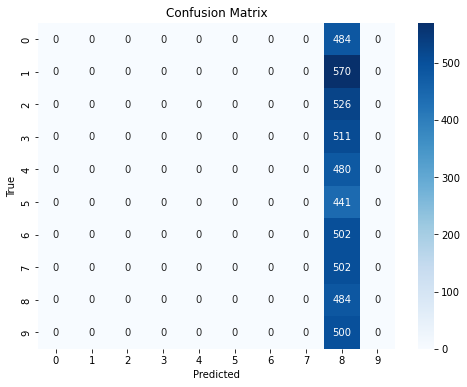

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       484
           1       0.00      0.00      0.00       570
           2       0.00      0.00      0.00       526
           3       0.00      0.00      0.00       511
           4       0.00      0.00      0.00       480
           5       0.00      0.00      0.00       441
           6       0.00      0.00      0.00       502
           7       0.00      0.00      0.00       502
           8       0.10      1.00      0.18       484
           9       0.00      0.00      0.00       500

    accuracy                           0.10      5000
   macro avg       0.01      0.10      0.02      5000
weighted avg       0.01      0.10      0.02      5000



In [69]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Assuming you have your trained model 'model' and test data 'test_images'

# Make predictions on the test data
predictions = model.predict(test_x)
predicted_labels = np.argmax(predictions, axis=1)  # Convert one-hot encoded labels to class labels

# True labels
true_labels = np.argmax(test_y, axis=1)

# Create a confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Create a classification report
class_report = classification_report(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print("Classification Report:\n", class_report)


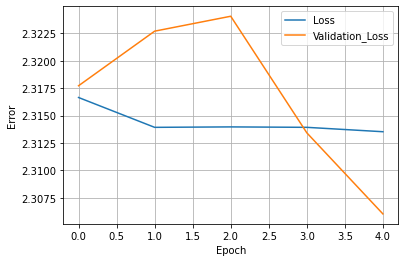

In [70]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation_Loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

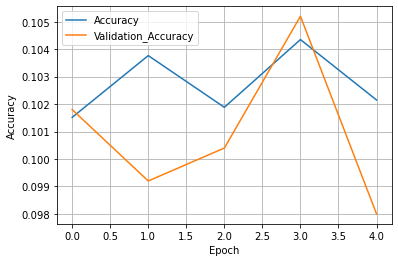

In [71]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation_Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)  

In [7]:
model = CNN()
rate = 0.01
adam = Adam(learning_rate=rate)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy',f1_m,precision_m, recall_m])
history = model.fit(train_x, train_y, epochs=5, batch_size=128, validation_data = (valid_x,valid_y))

Epoch 1/5
469/469 [==============================] - 38s 75ms/step - loss: 0.2986 - accuracy: 0.9014 - f1_m: 0.3460 - precision_m: 0.2100 - recall_m: 0.9925 - val_loss: 0.1028 - val_accuracy: 0.9664 - val_f1_m: 0.3785 - val_precision_m: 0.2336 - val_recall_m: 0.9996
Epoch 2/5
469/469 [==============================] - 35s 74ms/step - loss: 0.1129 - accuracy: 0.9648 - f1_m: 0.3957 - precision_m: 0.2468 - recall_m: 0.9990 - val_loss: 0.0873 - val_accuracy: 0.9706 - val_f1_m: 0.4001 - val_precision_m: 0.2503 - val_recall_m: 0.9996
Epoch 3/5
469/469 [==============================] - 35s 74ms/step - loss: 0.0933 - accuracy: 0.9704 - f1_m: 0.4128 - precision_m: 0.2603 - recall_m: 0.9992 - val_loss: 0.0718 - val_accuracy: 0.9768 - val_f1_m: 0.4273 - val_precision_m: 0.2720 - val_recall_m: 0.9994
Epoch 4/5
469/469 [==============================] - 34s 73ms/step - loss: 0.0786 - accuracy: 0.9750 - f1_m: 0.4374 - precision_m: 0.2801 - recall_m: 0.9993 - val_loss: 0.0684 - val_accuracy: 0.9776 

In [8]:
test_loss, test_accuracy, test_f1, test_precision, test_recall= model.evaluate(test_x, test_y)

print('Test Loss: ',test_loss,'\nTest Accuracy: ',test_accuracy,'\nF1 Score: ',
      test_f1,'\nPrecision Score: ',test_precision,'Recall Score: ',test_recall)

157/157 [==============================] - 2s 11ms/step - loss: 0.0997 - accuracy: 0.9688 - f1_m: 0.4472 - precision_m: 0.2884 - recall_m: 0.9982
Test Loss:  0.09967828541994095 
Test Accuracy:  0.9688000082969666 
F1 Score:  0.44717150926589966 
Precision Score:  0.2883768379688263 Recall Score:  0.9982085824012756


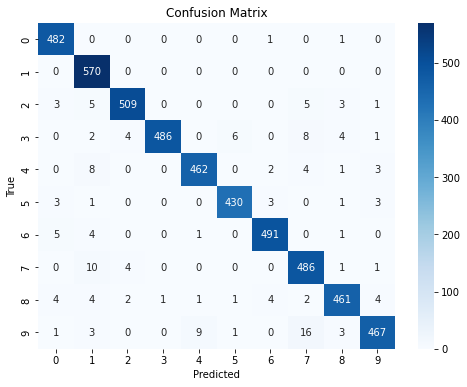

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       484
           1       0.94      1.00      0.97       570
           2       0.98      0.97      0.97       526
           3       1.00      0.95      0.97       511
           4       0.98      0.96      0.97       480
           5       0.98      0.98      0.98       441
           6       0.98      0.98      0.98       502
           7       0.93      0.97      0.95       502
           8       0.97      0.95      0.96       484
           9       0.97      0.93      0.95       500

    accuracy                           0.97      5000
   macro avg       0.97      0.97      0.97      5000
weighted avg       0.97      0.97      0.97      5000



In [9]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Assuming you have your trained model 'model' and test data 'test_images'

# Make predictions on the test data
predictions = model.predict(test_x)
predicted_labels = np.argmax(predictions, axis=1)  # Convert one-hot encoded labels to class labels

# True labels
true_labels = np.argmax(test_y, axis=1)

# Create a confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Create a classification report
class_report = classification_report(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print("Classification Report:\n", class_report)


In [10]:
model.get_weights()

[array([[[[ 0.5568659 , -0.60172015,  0.1270597 ,  0.2092042 ,
            0.06164242,  0.18076701,  0.23956202, -0.20809753,
           -0.01967955,  0.38198596, -0.01647029,  0.2996949 ,
           -0.25430426, -0.3267763 ,  0.44164714,  0.3529956 ,
           -0.11091607, -0.71836317, -0.03725851,  0.01333975,
            0.29878744, -0.5844641 ,  0.21310352, -0.91772574,
            0.01410451, -0.11941036, -0.01862016, -0.75371736,
           -0.5010964 ,  0.1541271 , -0.1232839 , -0.45193547]],
 
         [[-0.525379  ,  0.12415288,  0.22783192, -0.07681848,
           -0.10830731, -1.2341008 , -0.5796871 ,  0.14504968,
            0.02746052,  0.18679236, -0.05167441,  0.278199  ,
            0.19933258,  0.23671691,  0.0617371 , -0.15024568,
           -0.05623613,  0.22885063,  0.54526305, -0.0406025 ,
            0.38157257,  0.34983894, -0.0082878 , -0.3061151 ,
           -0.19513312,  0.35399523,  0.43759888, -0.58570087,
            0.33085695,  0.42641982, -0.13237438,  

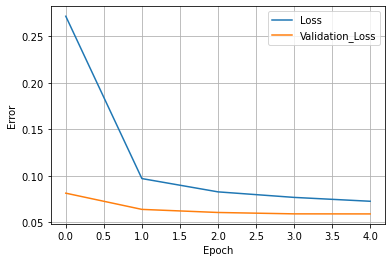

In [75]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation_Loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

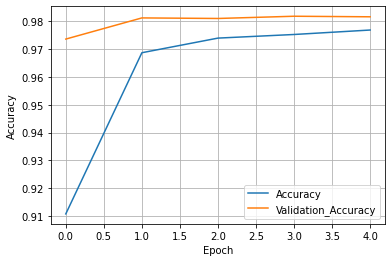

In [76]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation_Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)  

In [77]:
model = CNN()
rate = 0.001
adam = Adam(learning_rate=rate)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy',f1_m,precision_m, recall_m])
history = model.fit(train_x, train_y, epochs=5, batch_size=128, validation_data = (valid_x, valid_y))

Epoch 1/5
469/469 [==============================] - 22s 45ms/step - loss: 0.5219 - accuracy: 0.8279 - f1_m: 0.6297 - precision_m: 0.4868 - recall_m: 0.9204 - val_loss: 0.1648 - val_accuracy: 0.9498 - val_f1_m: 0.7662 - val_precision_m: 0.6358 - val_recall_m: 0.9654
Epoch 2/5
469/469 [==============================] - 21s 45ms/step - loss: 0.1522 - accuracy: 0.9527 - f1_m: 0.7841 - precision_m: 0.6589 - recall_m: 0.9692 - val_loss: 0.1139 - val_accuracy: 0.9660 - val_f1_m: 0.7952 - val_precision_m: 0.6706 - val_recall_m: 0.9779
Epoch 3/5
469/469 [==============================] - 24s 51ms/step - loss: 0.1172 - accuracy: 0.9629 - f1_m: 0.8126 - precision_m: 0.6975 - recall_m: 0.9747 - val_loss: 0.0887 - val_accuracy: 0.9728 - val_f1_m: 0.8207 - val_precision_m: 0.7041 - val_recall_m: 0.9852
Epoch 4/5
469/469 [==============================] - 22s 46ms/step - loss: 0.1009 - accuracy: 0.9687 - f1_m: 0.8270 - precision_m: 0.7176 - recall_m: 0.9770 - val_loss: 0.0755 - val_accuracy: 0.9752 

In [78]:
test_loss, test_accuracy, test_f1, test_precision, test_recall= model.evaluate(test_x, test_y)

print('Test Loss: ',test_loss,'\nTest Accuracy: ',test_accuracy,'\nF1 Score: ',
      test_f1,'\nPrecision Score: ',test_precision,'Recall Score: ',test_recall)

157/157 [==============================] - 1s 7ms/step - loss: 0.0803 - accuracy: 0.9742 - f1_m: 0.8489 - precision_m: 0.7492 - recall_m: 0.9821
Test Loss:  0.08031272888183594 
Test Accuracy:  0.9742000102996826 
F1 Score:  0.8488905429840088 
Precision Score:  0.7491655349731445 Recall Score:  0.9820860028266907


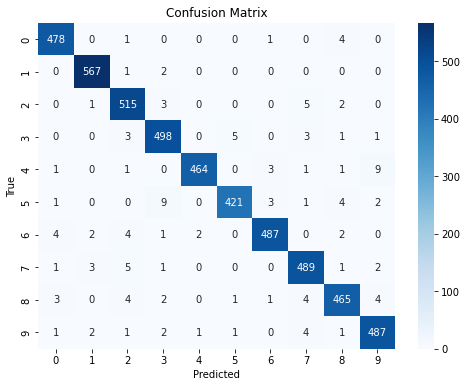

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       484
           1       0.99      0.99      0.99       570
           2       0.96      0.98      0.97       526
           3       0.96      0.97      0.97       511
           4       0.99      0.97      0.98       480
           5       0.98      0.95      0.97       441
           6       0.98      0.97      0.98       502
           7       0.96      0.97      0.97       502
           8       0.97      0.96      0.96       484
           9       0.96      0.97      0.97       500

    accuracy                           0.97      5000
   macro avg       0.97      0.97      0.97      5000
weighted avg       0.97      0.97      0.97      5000



In [79]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Assuming you have your trained model 'model' and test data 'test_images'

# Make predictions on the test data
predictions = model.predict(test_x)
predicted_labels = np.argmax(predictions, axis=1)  # Convert one-hot encoded labels to class labels

# True labels
true_labels = np.argmax(test_y, axis=1)

# Create a confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Create a classification report
class_report = classification_report(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print("Classification Report:\n", class_report)


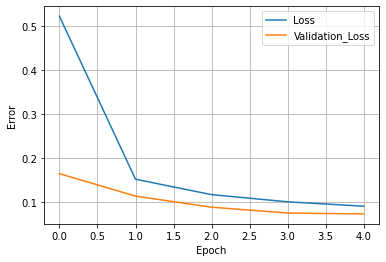

In [80]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation_Loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

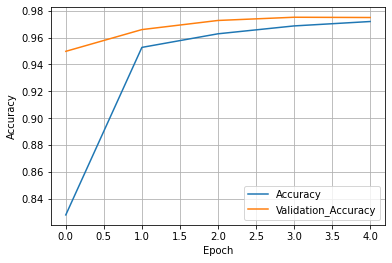

In [81]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation_Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)  

In [82]:
model = CNN()
rate = 0.0001
adam = Adam(learning_rate=rate)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy',f1_m,precision_m, recall_m])
history = model.fit(train_x, train_y, epochs=5, batch_size=128, validation_data=(valid_x, valid_y))

Epoch 1/5
469/469 [==============================] - 27s 57ms/step - loss: 2.0182 - accuracy: 0.3488 - f1_m: 0.2584 - precision_m: 0.1536 - recall_m: 0.8246 - val_loss: 1.4538 - val_accuracy: 0.5360 - val_f1_m: 0.3357 - val_precision_m: 0.2078 - val_recall_m: 0.8758
Epoch 2/5
469/469 [==============================] - 22s 47ms/step - loss: 1.1013 - accuracy: 0.6521 - f1_m: 0.3672 - precision_m: 0.2294 - recall_m: 0.9245 - val_loss: 0.8203 - val_accuracy: 0.7412 - val_f1_m: 0.3988 - val_precision_m: 0.2523 - val_recall_m: 0.9514
Epoch 3/5
469/469 [==============================] - 25s 52ms/step - loss: 0.7199 - accuracy: 0.7758 - f1_m: 0.4170 - precision_m: 0.2667 - recall_m: 0.9570 - val_loss: 0.5704 - val_accuracy: 0.8262 - val_f1_m: 0.4372 - val_precision_m: 0.2825 - val_recall_m: 0.9695
Epoch 4/5
469/469 [==============================] - 23s 49ms/step - loss: 0.5256 - accuracy: 0.8405 - f1_m: 0.4278 - precision_m: 0.2742 - recall_m: 0.9735 - val_loss: 0.4224 - val_accuracy: 0.8758 

In [83]:
test_loss, test_accuracy, test_f1, test_precision, test_recall= model.evaluate(test_x, test_y)

print('Test Loss: ',test_loss,'\nTest Accuracy: ',test_accuracy,'\nF1 Score: ',
      test_f1,'\nPrecision Score: ',test_precision,'Recall Score: ',test_recall)

157/157 [==============================] - 1s 8ms/step - loss: 0.3414 - accuracy: 0.8896 - f1_m: 0.4429 - precision_m: 0.2858 - recall_m: 0.9891
Test Loss:  0.34142446517944336 
Test Accuracy:  0.8895999789237976 
F1 Score:  0.4429019093513489 
Precision Score:  0.2857836186885834 Recall Score:  0.9890525341033936


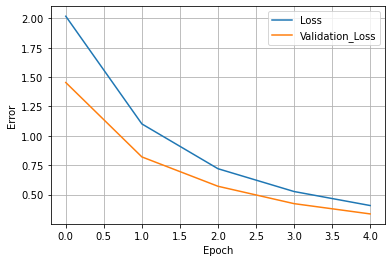

In [84]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation_Loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

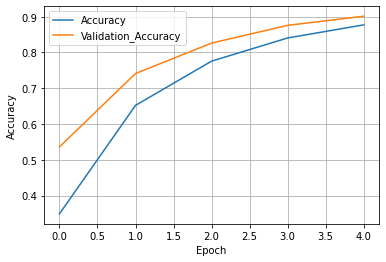

In [85]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation_Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True) 

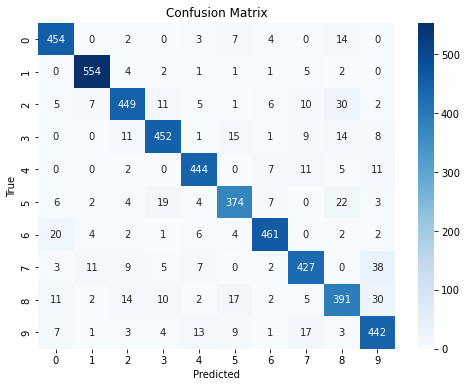

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       484
           1       0.95      0.97      0.96       570
           2       0.90      0.85      0.88       526
           3       0.90      0.88      0.89       511
           4       0.91      0.93      0.92       480
           5       0.87      0.85      0.86       441
           6       0.94      0.92      0.93       502
           7       0.88      0.85      0.87       502
           8       0.81      0.81      0.81       484
           9       0.82      0.88      0.85       500

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



In [86]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Assuming you have your trained model 'model' and test data 'test_images'

# Make predictions on the test data
predictions = model.predict(test_x)
predicted_labels = np.argmax(predictions, axis=1)  # Convert one-hot encoded labels to class labels

# True labels
true_labels = np.argmax(test_y, axis=1)

# Create a confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Create a classification report
class_report = classification_report(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print("Classification Report:\n", class_report)
